In [4]:
## import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # scales our datapoints - 0-1
from sklearn.datasets import load_iris

In [2]:
# load our data

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


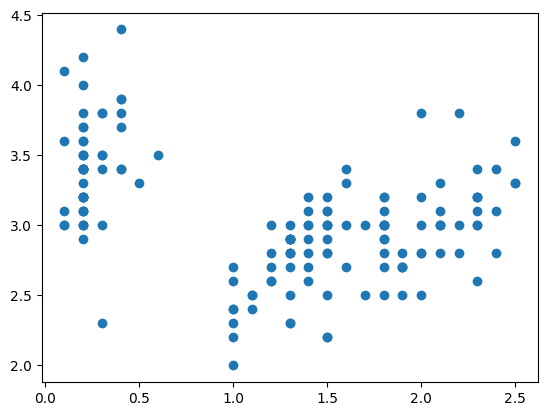

In [12]:
plt.scatter(df['petal width (cm)'], df['sepal width (cm)'])

In [15]:
## Scaling

scaler = MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['sepal width (cm)'] = scaler.fit_transform(df[['sepal width (cm)']])
df['sepal length (cm)'] = scaler.fit_transform(df[['sepal length (cm)']])
df['target'] = scaler.fit_transform(df[['target']])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [18]:
X = df.drop('target', axis='columns')
y = df.target

In [17]:
# modelling
kmeans = KMeans()

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X,y)
    sse.append(km.inertia_)

Text(0.5, 0, 'Range')

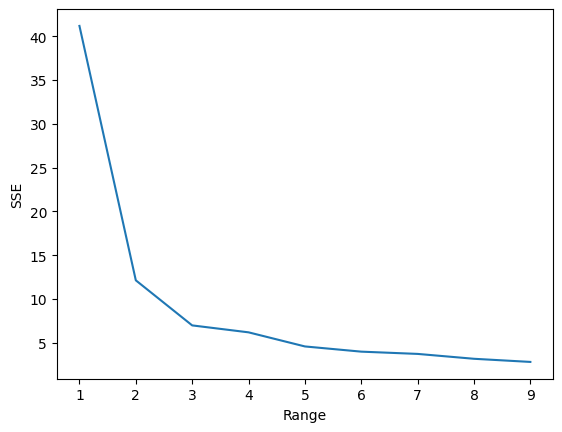

In [22]:
plt.plot(k_rng,sse)
plt.ylabel('SSE')
plt.xlabel('Range')